In [798]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap
import folium
import plotly.graph_objects as go
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
STOPWORDS.add("br")
import scipy as sp
import scipy.stats as stats

In [79]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list


In [80]:
API_df = pd.read_csv('Data/API_DF_CN.csv')

In [81]:
# pd.set_option('display.max_colwidth', -1)
API_df.head(0)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1


In [82]:
# # Charity Count Bar Graph Total - By State
# category_count = API_df.groupby('stateOrProvince').size().sort_values(ascending=False)
# category_count = category_count.iloc[0:10]
# categories = list(category_count.index.values)
# categories = wrap_axis_labels(categories,13)

# freq = freq_array(category_count)
    
# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(categories,freq, color = "g");
# ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=20)

# # Needs Adjustment based on Data
# ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# ax.set_title("Charities Counts by State - Rated", weight = "bold",fontsize=30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+200,200), weight="bold", fontsize =20) ;


# set_labels(freq,ax,.20,(np.max(freq)/100),fsize=20,c="k")
# plt.savefig("Charities_by_state")

In [83]:
# # Charity Count Bar Graph Total - By Category
# category_count = API_df.groupby('categoryName').size()
# categories = list(category_count.index.values)
# categories = wrap_axis_labels(categories,13)

# freq = freq_array(category_count)
    
# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(categories,freq, color = "b");
# ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# # Needs Adjustment based on Data
# ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# ax.set_title("Charities by Category", weight = "bold",fontsize=30);
# ax.set_xlabel("Category", fontsize=25, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+200,200), weight="bold", fontsize =15) ;


# set_labels(freq,ax,.20,(np.max(freq)/100),fsize=15,c="k")
# plt.savefig("Charities_by_category")

In [84]:
# # 4 vs. 3 -Star Charities Count Bar Graph
# Four_Star_Charities_Total = API_df[API_df['rating'] == 4.0]
# Three_Star_Charities_Total = API_df[API_df['rating'] == 3.0]

# #Four-Star
# four_star_count = Four_Star_Charities_Total.groupby("categoryName").size()
# categories = list(four_star_count.index.values)
# categories = wrap_axis_labels(categories,13)

# ind = np.arange(len(categories)) 

# freq = freq_array(four_star_count)
    
# fig,ax = plt.subplots(figsize = (18,10),sharex=True,sharey=True)
# ax.bar(ind,freq, color = "b",width=0.35,label="Four-Star Charities");

# # Needs Adjustment based on Data

# ax.set_yticklabels(np.arange(0,np.max(freq)+200,100), weight="bold", fontsize =12) ;
# ax.set_title("Four-Star vs. Three-Star Charities by Category", weight = "bold",fontsize=25);
# ax.set_xlabel("Category", fontsize=20, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=20, weight = "bold");

# set_labels(freq,ax,.2,(np.max(freq)/100),fsize=14,c="blue")
    
# #Three-Star
# three_star_count = Three_Star_Charities_Total.groupby("categoryName").size()
# categories_2 = list(three_star_count.index.values)

# ind_2 = np.arange(len(categories_2)) 

# freq_2 = freq_array(three_star_count)
    
# ax.bar(ind_2+.35,freq_2, color = "orange",width=0.35,label="Three-Star Charities");

# # Needs Adjustment based on Data
# # ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# # ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
# # ax.set_xlabel("Category", fontsize=15, weight = "bold");
# # ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

# set_labels(freq_2,ax,-.2,(np.max(freq)/100),fsize=14,c='black')

# ax.set_yticks(np.arange(0,(np.max(freq)+100),100)) ;
# ax.set_xticks(ind + .35 / 2)
# ax.set_xticklabels(categories, weight="bold",fontsize=11);
# ax.legend(prop={'size': 20});

# # plt.savefig("Four_Star_vs_Three_Star_Categories")

In [85]:
# state_df = API_df.groupby("stateOrProvince").size().reset_index(name="Count")
# fig = go.Figure(data=go.Choropleth(
#     locations = state_df['stateOrProvince'],
#     z=state_df['Count'],
#     locationmode='USA-states',
#     colorscale='Greens',
#     autocolorscale=False,
#     text=state_df['stateOrProvince'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Number of Charities"
# ))

# fig.update_layout(
#     title_text='Number of US Charitable Organizations by State - Rated<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [86]:
API_df.head(0)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1


In [87]:
# text = API_df.mission.values
# wordcloud = WordCloud(
#     width = 3000,
#     height = 2000,
#     background_color = 'white',
# #     color_func = 'grey',
#     stopwords = STOPWORDS).generate(' '.join(text))
# fig = plt.figure(
#     figsize = (20, 15),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.savefig("Mission_Wordmap")
# plt.show()

In [88]:
# pop_data = pd.read_csv('Data/acs2017_census_tract_data.csv')
# pop_data = pop_data.groupby("State")["TotalPop"].sum().reset_index(name="Population")
# pop_abbrv = pd.read_csv('Data/states.csv')
# pop_df = pd.merge(pop_data, pop_abbrv, on='State')
# pop_df["stateOrProvince"] = pop_df["Abbreviation"]
# pop_df = pop_df.drop(columns=["Abbreviation"])

In [89]:
# category_count = API_df.groupby('stateOrProvince').size().sort_values(ascending=False).reset_index(name="count")
# category_count.head()

In [90]:
# income_df = API_df.groupby("stateOrProvince")["incomeAmount"].sum().reset_index(name="Sum_Income")

In [91]:
# income_df.head()

In [92]:
# add_pop = pd.merge(pop_df, category_count, on = "stateOrProvince")
# add_pop["Num_Charities_Per_Capita"] = (add_pop["count"] / add_pop["Population"])
# add_pop = pd.merge(add_pop, income_df, on = "stateOrProvince")
# add_pop["Income_Per_Capita"] = add_pop["Sum_Income"] / add_pop["Population"]
##Dropping District of Colombia
# add_pop = add_pop.drop(add_pop.index[8])

In [93]:
# fig = go.Figure(data=go.Choropleth(
#     locations = add_pop['stateOrProvince'],
#     z=add_pop['Income_Per_Capita'],
#     locationmode='USA-states',
#     colorscale='Greens',
#     autocolorscale=False,
#     text=add_pop['stateOrProvince'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income Per Capita"
# ))

# fig.update_layout(
#     title_text='Charity Income Per Capita by State - Rated Charities<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [705]:
category_df_count = API_df.groupby('categoryName').size().reset_index(name="Count").sort_values(by = 'Count', ascending=False)

In [706]:
category_df_count

,categoryName,Count
6,Human Services,2434
1,"Arts, Culture, Humanities",1231
5,Health,885
2,Community Development,816
3,Education,676
8,International,625
0,Animals,488
9,Religion,459
4,Environment,450
7,Human and Civil Rights,369


In [94]:
category_df_income = API_df.groupby('categoryName')['incomeAmount'].sum().reset_index(name="IncomeSum").sort_values(by = 'IncomeSum', ascending=False)

In [718]:
category_df_income['IncomeAdjusted'] = category_df_income['IncomeSum'] / 1000000

In [709]:
category_df_income = pd.merge(category_df_income,category_df_count)

In [719]:
category_df_income["AVG_Income"] = round((category_df_income["IncomeAdjusted"] / category_df_income["Count"]),2)

In [729]:
International_df = API_df[API_df["categoryName"]=="International"]
CommDev_df = API_df[API_df["categoryName"]=="Community Development"]
Health_df = API_df[API_df["categoryName"]=="Health"]
ACH_df = API_df[API_df["categoryName"]=="Arts, Culture, Humanities"]
HS_df = API_df[API_df["categoryName"]=="Human Services"]

International_df_incomes = International_df["incomeAmount"]
CommDev_df_incomes = CommDev_df["incomeAmount"]
Health_df_incomes = Health_df["incomeAmount"]
ACH_df_incomes = ACH_df["incomeAmount"]
HS_df_incomes = HS_df["incomeAmount"]

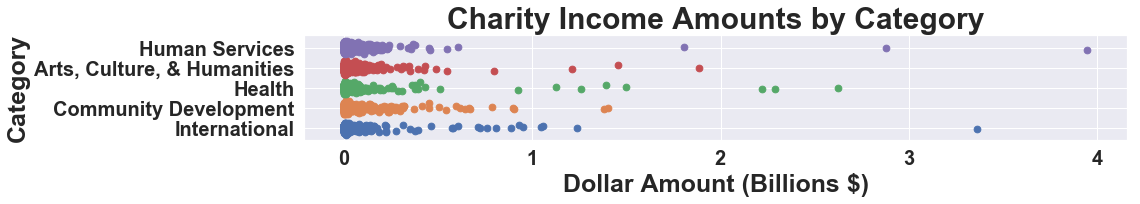

In [737]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(International_df_incomes, np.repeat(0, len(International_df_incomes)) + np.random.normal(0, 0.1, len(International_df_incomes)), s=45)
ax.scatter(CommDev_df_incomes, np.repeat(1, len(CommDev_df_incomes)) + np.random.normal(0, 0.1, len(CommDev_df_incomes)), s=45)
ax.scatter(Health_df_incomes, np.repeat(2, len(Health_df_incomes)) + np.random.normal(0, 0.1, len(Health_df_incomes)), s=45)
ax.scatter(ACH_df_incomes, np.repeat(3, len(ACH_df_incomes)) + np.random.normal(0, 0.1, len(ACH_df_incomes)), s=45)
ax.scatter(HS_df_incomes, np.repeat(4, len(HS_df_incomes)) + np.random.normal(0, 0.1, len(HS_df_incomes)), s=45)

ax.set_xticks(np.arange(0,np.max(HS_df_incomes+1000000000), 1000000000))
ax.set_xticklabels((["0", "1", "2", "3", "4"]),fontsize = 20, weight = "bold")
ax.set_xlabel("Dollar Amount (Billions $)", fontsize = 25, weight = "bold")

ax.set_yticks([0, 1, 2, 3,4])
ax.set_yticklabels(["International", "Community Development", "Health", "Arts, Culture, & Humanities","Human Services"], fontsize = 20, weight = "bold") ;
ax.set_ylabel("Category", fontsize = 25, weight = "bold")

ax.set_title("Charity Income Amounts by Category", fontsize = 30, weight = "bold");

plt.tight_layout()
plt.savefig("Charity_Income_AMTs_Category")

In [739]:
res = stats.mannwhitneyu(International_df_incomes, CommDev_df_incomes, alternative="greater")
print("p-value for International <= Community Dev : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(International_df_incomes, Health_df_incomes, alternative="greater")
print("p-value for International <= Health        : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(International_df_incomes, ACH_df_incomes, alternative="greater")
print("p-value for International <= Arts, Cul, Hum: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(International_df_incomes, HS_df_incomes, alternative="greater")
print("p-value for International <= Human Services: {:2.5f}".format(res.pvalue))

p-value for International <= Community Dev : 0.16293
p-value for International <= Health        : 0.00648
p-value for International <= Arts, Cul, Hum: 0.89046
p-value for International <= Human Services: 0.06340


In [740]:
res = stats.mannwhitneyu(CommDev_df_incomes, International_df_incomes, alternative="greater")
print("p-value for Community Dev <= International : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(CommDev_df_incomes, Health_df_incomes, alternative="greater")
print("p-value for Community Dev <= Health        : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(CommDev_df_incomes, ACH_df_incomes, alternative="greater")
print("p-value for Community Dev <= Arts, Cul, Hum: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(CommDev_df_incomes, HS_df_incomes, alternative="greater")
print("p-value for Community Dev <= Human Services: {:2.5f}".format(res.pvalue))

p-value for Community Dev <= International : 0.83723
p-value for Community Dev <= Health        : 0.07353
p-value for Community Dev <= Arts, Cul, Hum: 0.99666
p-value for Community Dev <= Human Services: 0.45610


In [743]:
res = stats.mannwhitneyu(Health_df_incomes, International_df_incomes, alternative="greater")
print("p-value for Health <= International     : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Health_df_incomes, CommDev_df_incomes, alternative="greater")
print("p-value for Health <= Community Dev : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Health_df_incomes, ACH_df_incomes, alternative="greater")
print("p-value for Health <= Arts, Cul, Hum: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Health_df_incomes, HS_df_incomes, alternative="greater")
print("p-value for Health <= Human Services: {:2.5f}".format(res.pvalue))

p-value for Health <= International     : 0.99352
p-value for Health <= Community Dev : 0.92666
p-value for Health <= Arts, Cul, Hum: 1.00000
p-value for Health <= Human Services: 0.97998


In [744]:
res = stats.mannwhitneyu(ACH_df_incomes, International_df_incomes, alternative="greater")
print("p-value for Arts, Cul, Hum <= International : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(ACH_df_incomes, Health_df_incomes, alternative="greater")
print("p-value for Arts, Cul, Hum <= Health        : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(ACH_df_incomes, CommDev_df_incomes, alternative="greater")
print("p-value for Arts, Cul, Hum <= Community Dev : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(ACH_df_incomes, HS_df_incomes, alternative="greater")
print("p-value for Arts, Cul, Hum <= Human Services: {:2.5f}".format(res.pvalue))

p-value for Arts, Cul, Hum <= International : 0.10947
p-value for Arts, Cul, Hum <= Health        : 0.00000
p-value for Arts, Cul, Hum <= Community Dev : 0.00334
p-value for Arts, Cul, Hum <= Human Services: 0.00001


In [745]:
res = stats.mannwhitneyu(HS_df_incomes, International_df_incomes, alternative="greater")
print("p-value for Human Services <= International : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(HS_df_incomes, Health_df_incomes, alternative="greater")
print("p-value for Human Services <= Health        : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(HS_df_incomes, ACH_df_incomes, alternative="greater")
print("p-value for Human Services <= Arts, Cul, Hum: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(HS_df_incomes, CommDev_df_incomes, alternative="greater")
print("p-value for Human Services <= Community Dev : {:2.5f}".format(res.pvalue))

p-value for Human Services <= International : 0.93670
p-value for Human Services <= Health        : 0.02002
p-value for Human Services <= Arts, Cul, Hum: 0.99999
p-value for Human Services <= Community Dev : 0.54388


In [774]:
International_df_incomes;

In [ ]:
# a1=International_df[['kCH4_sync','categoryName']]
# ax = a1.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
#                 showbox=True, showfliers=False, return_type='axes')
# a2 = a[['CH4_sync','week_days']]
# a2.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
#            showbox=True, showfliers=False, ax=ax)

In [772]:
top_five_cat_df = pd.concat([International_df, CommDev_df, Health_df, ACH_df, HS_df])



In [796]:
list(International_df["incomeAmount"])

[15631712.0,
 3409996.0,
 3362234653.0,
 57425524.0,
 6697432.0,
 2742789.0,
 5779779.0,
 2831586.0,
 31211573.0,
 3121650.0,
 3151617.0,
 4331122.0,
 1078032.0,
 12511557.0,
 220950395.0,
 2970144.0,
 4669735.0,
 9247911.0,
 5170782.0,
 2267350.0,
 1164851.0,
 5857484.0,
 8793401.0,
 86882141.0,
 2070847.0,
 90630940.0,
 6733829.0,
 11855904.0,
 1239213214.0,
 63812453.0,
 68078723.0,
 12482452.0,
 6029283.0,
 1054351497.0,
 602861106.0,
 119748132.0,
 2601399.0,
 5130127.0,
 7110523.0,
 138508430.0,
 112008723.0,
 20282388.0,
 6798202.0,
 51759791.0,
 5038744.0,
 36506781.0,
 1896054.0,
 6847768.0,
 12832840.0,
 29904970.0,
 7730674.0,
 3774808.0,
 10731006.0,
 2488251.0,
 13633669.0,
 16446627.0,
 9171313.0,
 576938138.0,
 3889069.0,
 4863710.0,
 1750054.0,
 6487284.0,
 6697554.0,
 24354927.0,
 9032668.0,
 390130894.0,
 2666231.0,
 2425848.0,
 10615524.0,
 2942431.0,
 30509904.0,
 55120754.0,
 11085859.0,
 29103828.0,
 885480570.0,
 24004194.0,
 6295933.0,
 5493455.0,
 1621138.0,
 4

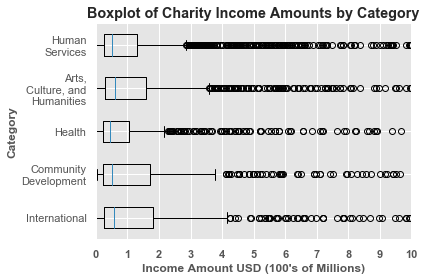

In [845]:
value1= list(International_df["incomeAmount"].dropna())
value2= list(CommDev_df["incomeAmount"].dropna())
value3= list(Health_df["incomeAmount"].dropna())
value4= list(ACH_df["incomeAmount"].dropna())
value5= HS_df["incomeAmount"].dropna()

labels=["International","Community Development","Health", "Arts, Culture, and Humanities","Human Services"]
labels = wrap_axis_labels(labels,13)

box_plot_data=[value1,value2,value3,value4,value5]
plt.boxplot(box_plot_data, vert=0,labels=labels);
plt.xlabel("Income Amount USD (100's of Millions)",weight="bold") ; plt.ylabel("Category",weight="bold") ; plt.title("Boxplot of Charity Income Amounts by Category", weight="bold")
plt.xticks(np.arange(0,1*10**8+1,10**7),["0","1","2","3","4","5","6","7","8","9","10"],weight="bold");
plt.xlim((0,1*10**8))

# box_plot_data=[value1,value2,value3,value4]
# box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['course1','course2','course3','course4'])
 
# colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

plt.tight_layout()
plt.savefig("Category Boxplots");

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

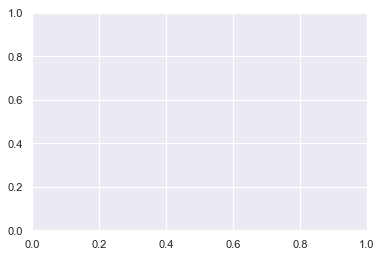

In [785]:
fig, ax = plt.subplots()
ax.boxplot(top_five_cat_df['incomeAmount'], top_five_cat_df['categoryName']);

In [767]:
# fig, ax = plt.subplots(figsize=(20,10))

# ax.boxplot(International_df_incomes)


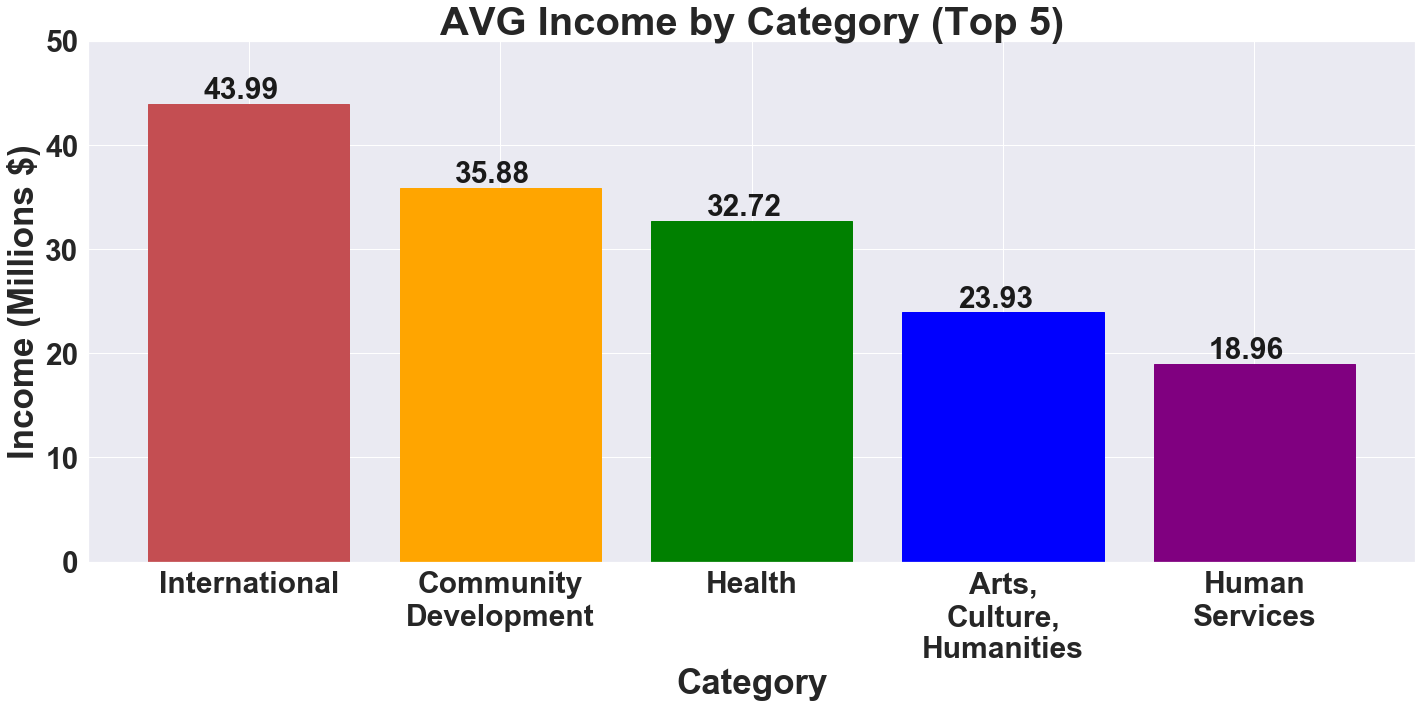

In [728]:
# # Category Income Bar Graph (Top 10)
#state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# category_df_income = API_df.groupby('categoryName')['incomeAmount'].sum().reset_index(name="IncomeSum").sort_values(by = 'IncomeSum', ascending=False)
category_df_income = category_df_income.sort_values(by="AVG_Income",ascending=False)

categories = category_df_income['categoryName']
categories = wrap_axis_labels(categories,13)


freq = freq_array(category_df_income['AVG_Income'])
fig,ax = plt.subplots(figsize = (20,10))
ax.bar(categories,freq, color = "g");

ax.set_yticks(np.arange(0,51,10));
ax.set_title("AVG Income by Category (Top 5)", weight = "bold", fontsize = 40);
ax.set_xlabel("Category", fontsize=35, weight = "bold");
ax.set_ylabel("Income (Millions $)", fontsize=35, weight = "bold");
ax.set_yticklabels(np.arange(0,51,10), weight="bold", fontsize =30) ;
ax.set_xticklabels(categories, weight="bold",fontsize=30);

set_labels(freq,ax,.18,0.5,c="k",fsize=30);
plt.tight_layout()

ax.get_children()[0].set_color('r')
ax.get_children()[1].set_color('orange')
ax.get_children()[2].set_color('green')
ax.get_children()[3].set_color('blue')
ax.get_children()[4].set_color('purple')

plt.savefig("Total_Income_By_Category")

## Next Step: Top Category By Income For Each State

In [748]:
API_df.groupby("classification").size().sort_values(ascending=False)

classification
Charitable Organization                        6492
Educational Organization                       1563
Religious Organization                          305
Organization to Prevent Cruelty to Animals      171
Scientific Organization                          35
Literary Organization                            35
Organization to Prevent Cruelty to Children      17
Organization for Public Safety Testing            4
dtype: int64

In [755]:
charity_df = API_df[API_df["classification"]=="Charitable Organization"]
Ed_df = API_df[API_df["classification"]=="Educational Organization"]
Rel_df = API_df[API_df["classification"]=="Religious Organization"]
Animal_df = API_df[API_df["classification"]=="Organization to Prevent Cruelty to Animals"]

charity_df_incomes = charity_df["incomeAmount"]
Ed_df_incomes = Ed_df["incomeAmount"]
Rel_df_incomes = Rel_df["incomeAmount"]
Animal_df_incomes = Animal_df["incomeAmount"]


In [756]:
Animal_df_incomes.head()

12      4789054.0
67      5854966.0
137    14911813.0
192     7803591.0
207     3109704.0
Name: incomeAmount, dtype: float64

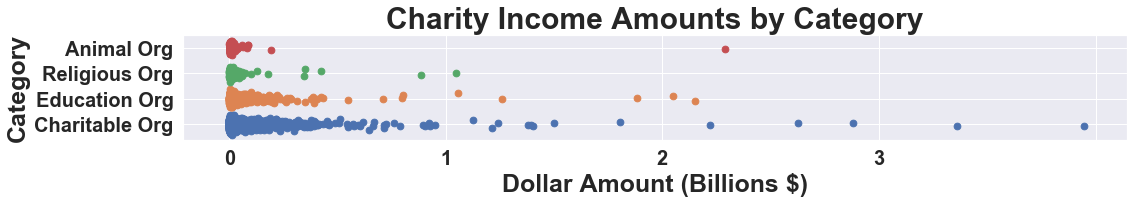

In [757]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(charity_df_incomes, np.repeat(0, len(charity_df_incomes)) + np.random.normal(0, 0.1, len(charity_df_incomes)), s=45)
ax.scatter(Ed_df_incomes, np.repeat(1, len(Ed_df_incomes)) + np.random.normal(0, 0.1, len(Ed_df_incomes)), s=45)
ax.scatter(Rel_df_incomes, np.repeat(2, len(Rel_df_incomes)) + np.random.normal(0, 0.1, len(Rel_df_incomes)), s=45)
ax.scatter(Animal_df_incomes, np.repeat(3, len(Animal_df_incomes)) + np.random.normal(0, 0.1, len(Animal_df_incomes)), s=45)

ax.set_xticks(np.arange(0,np.max(HS_df_incomes+1000000000), 1000000000))
ax.set_xticklabels((["0", "1", "2", "3"]),fontsize = 20, weight = "bold")
ax.set_xlabel("Dollar Amount (Billions $)", fontsize = 25, weight = "bold")

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["Charitable Org", "Education Org", "Religious Org", "Animal Org"], fontsize = 20, weight = "bold") ;
ax.set_ylabel("Category", fontsize = 25, weight = "bold")

ax.set_title("Charity Income Amounts by Category", fontsize = 30, weight = "bold");

plt.tight_layout()
# plt.savefig("Charity_Income_AMTs_Category")

In [759]:
res = stats.mannwhitneyu(charity_df_incomes, Ed_df_incomes, alternative="greater")
print("p-value for Charity_Org <= Education_Org: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(charity_df_incomes, Rel_df_incomes, alternative="greater")
print("p-value for Charity_Org <= Religious_Org: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(charity_df_incomes, Animal_df_incomes, alternative="greater")
print("p-value for Charity_Org <= Animal_Org   : {:2.5f}".format(res.pvalue))


p-value for Charity_Org <= Education_Org: 0.99541
p-value for Charity_Org <= Religious_Org: 0.00031
p-value for Charity_Org <= Animal_Org   : 0.22310


In [761]:
res = stats.mannwhitneyu(Ed_df_incomes, charity_df_incomes, alternative="greater")
print("p-value for Education_Org <= Charity_Org  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Ed_df_incomes, Rel_df_incomes, alternative="greater")
print("p-value for Education_Org <= Religious_Org: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Ed_df_incomes, Animal_df_incomes, alternative="greater")
print("p-value for Education_Org <= Animal_Org   : {:2.5f}".format(res.pvalue))

p-value for Education_Org <= Charity_Org  : 0.00460
p-value for Education_Org <= Religious_Org: 0.00001
p-value for Education_Org <= Animal_Org   : 0.04353


In [762]:
res = stats.mannwhitneyu(Rel_df_incomes, charity_df_incomes, alternative="greater")
print("p-value for Religious_Org <= Charity_Org  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Rel_df_incomes, Ed_df_incomes, alternative="greater")
print("p-value for Religious_Org <= Education_Org: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Rel_df_incomes, Animal_df_incomes, alternative="greater")
print("p-value for Religious_Org <= Animal_Org   : {:2.5f}".format(res.pvalue))

p-value for Religious_Org <= Charity_Org  : 0.99969
p-value for Religious_Org <= Education_Org: 0.99999
p-value for Religious_Org <= Animal_Org   : 0.94853


In [763]:
res = stats.mannwhitneyu(Animal_df_incomes, charity_df_incomes, alternative="greater")
print("p-value for Animal_Org <= Charity_Org  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Animal_df_incomes, Rel_df_incomes, alternative="greater")
print("p-value for Animal_Org <= Religious_Org: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(Animal_df_incomes, Ed_df_incomes, alternative="greater")
print("p-value for Animal_Org <= Education_Org: {:2.5f}".format(res.pvalue))

p-value for Animal_Org <= Charity_Org  : 0.77692
p-value for Animal_Org <= Religious_Org: 0.05155
p-value for Animal_Org <= Education_Org: 0.95649


In [180]:
# state_category_count_df = API_df.groupby(["stateOrProvince","categoryName"]).size().reset_index(name="count")
# state_category_count_df.head()

In [178]:
# idx = state_category_count_df.groupby(['stateOrProvince'])['count'].transform(max) == state_category_count_df['count']

# state_category_max = state_category_count_df[idx]

In [179]:
# state_category_max.head(50)

In [279]:
fig = go.Figure(data=go.Choropleth(
    locations = state_category_max['stateOrProvince'],
    z=state_category_max['count'],
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=state_category_max['stateOrProvince'] + "<br>" + state_category_max["categoryName"], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Income Per Capita"
))

fig.update_layout(
    title_text='Charity Income Per Capita by State - Rated Charities<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [176]:
# state_category_income_df = API_df.groupby(["stateOrProvince","categoryName"])["incomeAmount"].sum().reset_index(name="IncomeSum")
# state_category_income_df.head(5)

In [175]:
# idx_income = state_category_income_df.groupby(['stateOrProvince'])['IncomeSum'].transform(max) == state_category_income_df['IncomeSum']

# state_category_income_max = state_category_income_df[idx_income]

In [173]:
# #state_category_income_max["cat_num"] = 0
# mask = (state_category_income_max['categoryName'] == "Education")
# z_valid = state_category_income_max[mask]

# state_category_income_max.loc[mask, 'cat_num'] = 4

In [183]:
# state_category_income_max

In [172]:
# fig = go.Figure(data=go.Choropleth(
#     locations = state_category_income_max['stateOrProvince'],
#     z=state_category_income_max['cat_num'],
#     locationmode='USA-states',
#     colorscale='Spectral',
#     autocolorscale=False,
#     text=state_category_income_max['stateOrProvince'] + "<br>" + state_category_income_max["categoryName"], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income Per Capita"
# ))

# fig.update_layout(
#     title_text='Charity Income Per Capita by State - Rated Charities<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [281]:
region1_northeast_list = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA"]
region2_midwest_list = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
region3_south_list = ["TX", "OK", "AR", "LA", "MS", "AL", "FL", "GA", "SC", "NC", "VA", "TN", "KY", "WV", "DC", "MD", "DE"]
region4_west_list = ["MT", "ID", "WY", "CO", "NM", "AZ", "UT", "NV", "CA", "OR", "WA", "AK", "HI"]


In [282]:
region1_northeast_df = API_df[API_df["stateOrProvince"].isin(region1_northeast_list)]
region2_midwest_df = API_df[API_df["stateOrProvince"].isin(region2_midwest_list)]
region3_south_df = API_df[API_df["stateOrProvince"].isin(region3_south_list)]
region4_west_df = API_df[API_df["stateOrProvince"].isin(region4_west_list)]

classification
Charitable Organization                        6492
Educational Organization                       1563
Literary Organization                            35
Organization for Public Safety Testing            4
Organization to Prevent Cruelty to Animals      171
Organization to Prevent Cruelty to Children      17
Religious Organization                          305
Scientific Organization                          35
dtype: int64

In [289]:
region3_south_df.sort_values(by="incomeAmount",ascending = False)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1
4188,American Red Cross,530196605,Since its founding in 1881 by visionary leader...,Helping prevent and alleviate human suffering ...,6,Human Services,15,Multipurpose Human Service Organizations,3.0,3.240247e+09,Charitable Organization,Contributions are deductible,1.0,3.948382e+09,American Red Cross,Human Services - Multipurpose and Other,Washington,20006,DC,"431 18th Street, NW"
699,Shriners Hospitals for Children,362193608,Shriners Hospitals for Children is a one-of-a-...,Love to the rescue.,5,Health,12,Treatment and Prevention Services,4.0,9.210344e+09,Organization to Prevent Cruelty to Animals,Contributions are deductible,1.0,2.288068e+09,"Hospital, Specialty",Health - General and Rehabilitative,Tampa,33607,FL,2900 Rocky Point Drive
2847,ALSAC - St. Jude Children's Research Hospital,351044585,ALSAC (American Lebanese Syrian Associated Cha...,Fundraising for St. Jude Children's Research H...,5,Health,12,Treatment and Prevention Services,4.0,4.780600e+09,Charitable Organization,Contributions are deductible,1.0,2.218193e+09,Fund Raising and/or Fund Distribution,"Religion-Related, Spiritual Development",Memphis,38105,TN,262 Danny Thomas Place
4415,UNCF,131624241,"Since its inception in 1944, UNCF has grown to...",A mind is a terrible thing to waste,3,Education,37,Scholarship and Financial Support,3.0,6.841648e+08,Educational Organization,Contributions are deductible,1.0,2.152270e+09,"Scholarships, Student Financial Aid Services, ...",Educational Institutions and Related Activities,Washington,20001,DC,"1805 7th Street, NW"
6105,The Nature Conservancy,530242652,The Nature Conservancy is a leading conservati...,Protecting nature. Preserving life.,4,Environment,11,Environmental Protection and Conservation,3.0,7.409865e+09,Educational Organization,Contributions are deductible,1.0,2.046553e+09,NaN,NaN,Arlington,22203,VA,4245 North Fairfax Drive
2383,Smithsonian Institution,530206027,Our Mission is the increase and diffusion of k...,Seriously Amazing,2,"Arts, Culture, Humanities",3,Museums,4.0,4.889815e+09,Educational Organization,Contributions are deductible,1.0,1.883676e+09,"Museum, Museum Activities","Arts, Culture and Humanities",Washington,20560,DC,Office of Advancement
4457,Boy Scouts of America National Council,221576300,The mission of the Boy Scouts of America (BSA)...,The nation's foremost youth program,6,Human Services,16,"Youth Development, Shelter, and Crisis Services",4.0,1.386074e+09,Charitable Organization,Contributions are deductible,1.0,1.804120e+09,Boy Scouts of America,Youth Development,Irving,75015,TX,1325 West Walnut Hill Lane
199,Cystic Fibrosis Foundation,131930701,The Cystic Fibrosis Foundation (CFF) was estab...,Adding tomorrows every day,5,Health,13,"Diseases, Disorders, and Disciplines",4.0,4.401078e+09,Charitable Organization,Contributions are deductible,1.0,1.393955e+09,Birth Defects and Genetic Diseases,"Diseases, Disorders, Medical Disciplines",Bethesda,20814,MD,4550 Montgomery Avenue
7340,American Cancer Society,131788491,The American Cancer Society's mission is to sa...,"Save lives, celebrate lives, and lead the figh...",5,Health,13,"Diseases, Disorders, and Disciplines",3.0,1.697658e+09,Educational Organization,Contributions are deductible,1.0,1.258482e+09,Cancer,"Diseases, Disorders, Medical Disciplines",Atlanta,30303,GA,"250 Williams Street, NW"
3191,American Heart Association,135613797,The American Heart Association is the nation's...,Live a Long and Healthy Life,5,Health,13,"Diseases, Disorders, and Disciplines",4.0,1.412916e+09,Charitable Organization,Contributions are deductible,1.0,1.125582e+09,"Heart and Circulatory System Diseases, Disorders","Diseases, Disorders, Medical Disciplines",Dallas,75231,TX,National Center


In [283]:
region1_charity_incomes = region1_northeast_df["incomeAmount"]
region2_charity_incomes = region2_midwest_df["incomeAmount"]
region3_charity_incomes = region3_south_df["incomeAmount"]
region4_charity_incomes = region4_west_df["incomeAmount"]

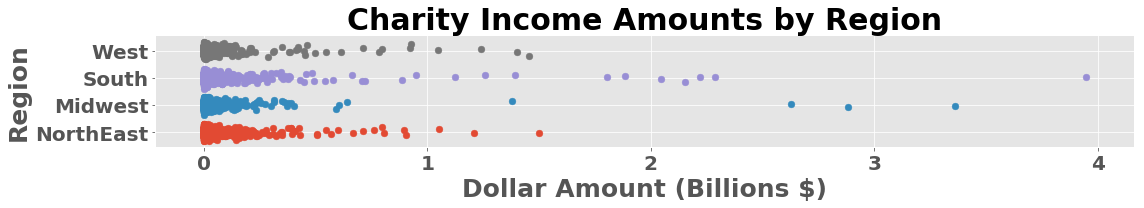

In [242]:

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(region1_charity_incomes, np.repeat(0, len(region1_charity_incomes)) + np.random.normal(0, 0.1, len(region1_charity_incomes)), s=45)
ax.scatter(region2_charity_incomes, np.repeat(1, len(region2_charity_incomes)) + np.random.normal(0, 0.1, len(region2_charity_incomes)), s=45)
ax.scatter(region3_charity_incomes, np.repeat(2, len(region3_charity_incomes)) + np.random.normal(0, 0.1, len(region3_charity_incomes)), s=45)
ax.scatter(region4_charity_incomes, np.repeat(3, len(region4_charity_incomes)) + np.random.normal(0, 0.1, len(region4_charity_incomes)), s=45)

ax.set_xticks(np.arange(0,np.max(region3_charity_incomes+1000000000), 1000000000))
ax.set_xticklabels((["0", "1", "2", "3", "4"]),fontsize = 20, weight = "bold")
ax.set_xlabel("Dollar Amount (Billions $)", fontsize = 25, weight = "bold")

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["NorthEast", "Midwest", "South", "West"], fontsize = 20, weight = "bold") ;
ax.set_ylabel("Region", fontsize = 25, weight = "bold")

ax.set_title("Charity Income Amounts by Region", fontsize = 30, weight = "bold");

plt.tight_layout()
plt.savefig("Charity_Income_AMTs_Regional")

In [ ]:
# # Region Income Bar Graph (Top 10)
#state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# category_df_income = API_df.groupby('categoryName')['incomeAmount'].sum().reset_index(name="IncomeSum").sort_values(by = 'IncomeSum', ascending=False)
category_df_income = category_df_income.sort_values(by="AVG_Income",ascending=False)

categories = category_df_income['categoryName']
categories = wrap_axis_labels(categories,13)


freq = freq_array(category_df_income['AVG_Income'])
fig,ax = plt.subplots(figsize = (20,10))
ax.bar(categories,freq, color = "g");

ax.set_yticks(np.arange(0,51,10));
ax.set_title("AVG Income by Category (Top 5)", weight = "bold", fontsize = 40);
ax.set_xlabel("Category", fontsize=35, weight = "bold");
ax.set_ylabel("Income (Millions $)", fontsize=35, weight = "bold");
ax.set_yticklabels(np.arange(0,51,10), weight="bold", fontsize =30) ;
ax.set_xticklabels(categories, weight="bold",fontsize=30);

set_labels(freq,ax,.18,0.5,c="k",fsize=30);
plt.tight_layout()

ax.get_children()[0].set_color('r')
ax.get_children()[1].set_color('orange')
ax.get_children()[2].set_color('green')
ax.get_children()[3].set_color('blue')
ax.get_children()[4].set_color('purple')

plt.savefig("Total_Income_By_Category")

In [297]:
import seaborn as sns

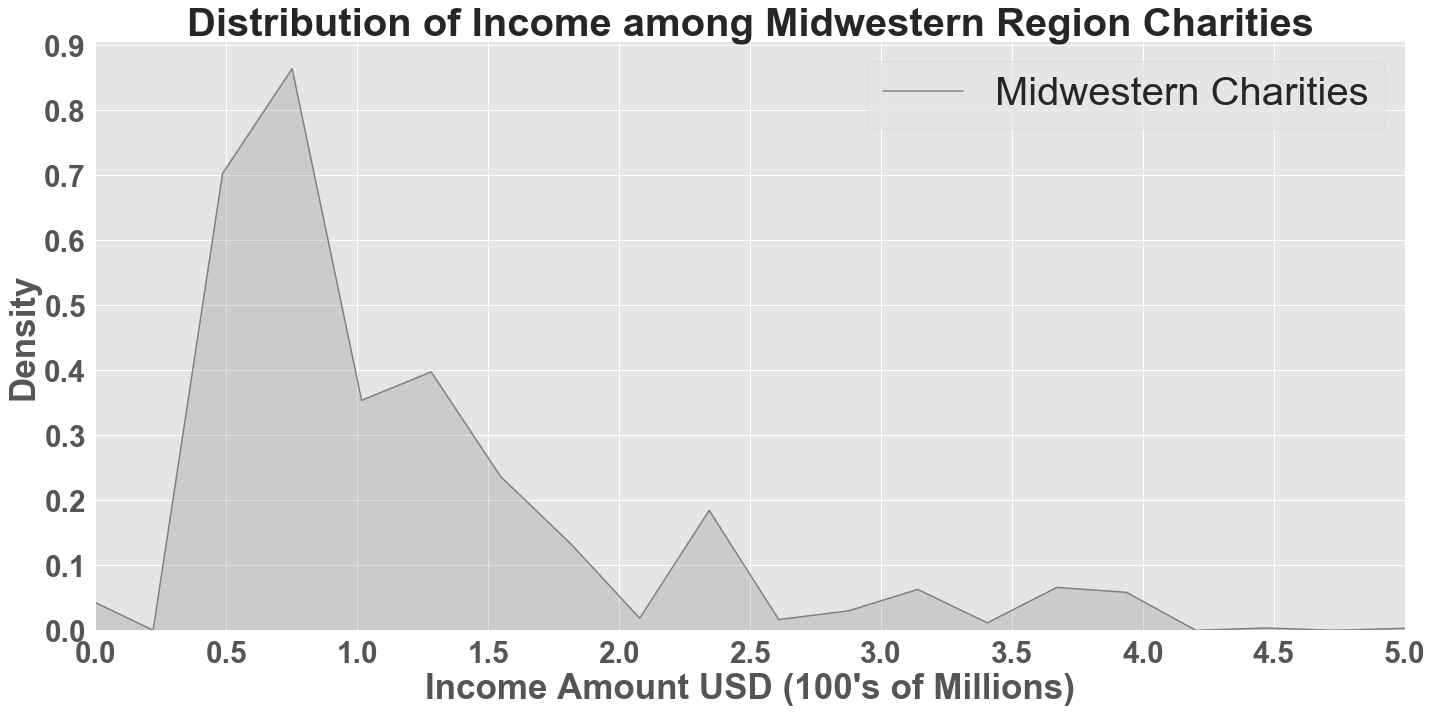

In [866]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(region2_charity_incomes, shade=True, color = "grey",label="Midwestern Charities");

ax.set_xlim(0,0.5 * 10**9)
ax.set_xticks(np.arange(0,0.5*10**9+1,5*10**7))
ax.set_xticklabels(np.arange(0,5+1,0.5), weight="bold",fontsize=30);
ax.set_xlabel("Income Amount USD (100's of Millions)", fontsize=35, weight = "bold")

ax.set_yticks(np.arange(0,0.1*10 ** -8,1*10**-10))
ax.set_yticklabels(["0.0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], weight="bold",fontsize=30);
ax.set_ylabel("Density", fontsize=35, weight = "bold")

ax.set_title("Distribution of Income among Midwestern Region Charities", fontsize=40, weight = "bold")
ax.legend(fontsize=40)

plt.tight_layout()
plt.savefig("Midwestern_Density")

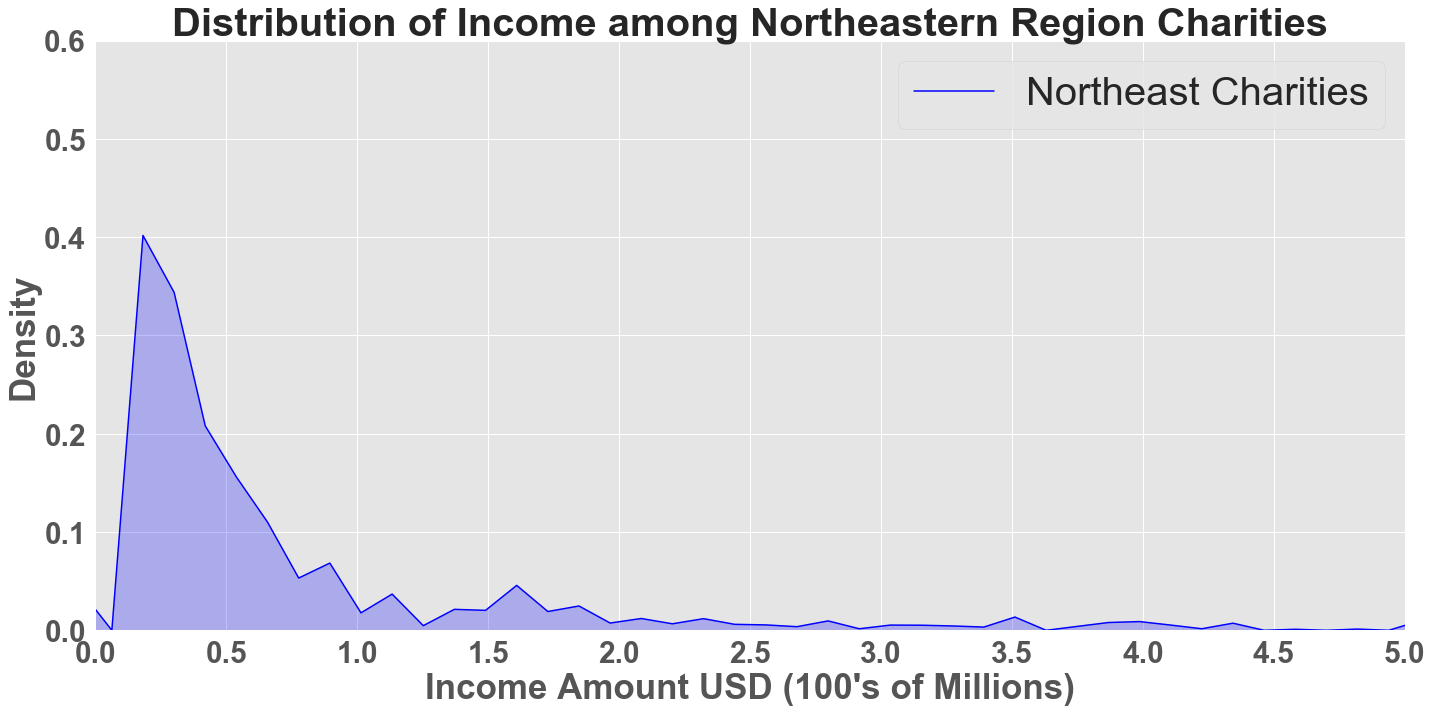

In [862]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(region1_charity_incomes, shade=True, color = "blue",label="Northeast Charities");

ax.set_xlim(0,0.5 * 10**9)
ax.set_xticks(np.arange(0,0.5*10**9+1,5*10**7))
ax.set_xticklabels(np.arange(0,6+1,0.5), weight="bold",fontsize=30);
ax.set_xlabel("Income Amount USD (100's of Millions)", fontsize=35, weight = "bold")

ax.set_yticks(np.arange(0,0.65*10 ** -8,1*10**-9))
ax.set_yticklabels(["0.0","0.1","0.2","0.3","0.4","0.5","0.6",], weight="bold",fontsize=30);
ax.set_ylabel("Density", fontsize=35,weight="bold")
ax.set_title("Distribution of Income among Northeastern Region Charities", fontsize=40, weight = "bold")
ax.legend(fontsize=40)

plt.tight_layout()
plt.savefig("Northeastern_Density")

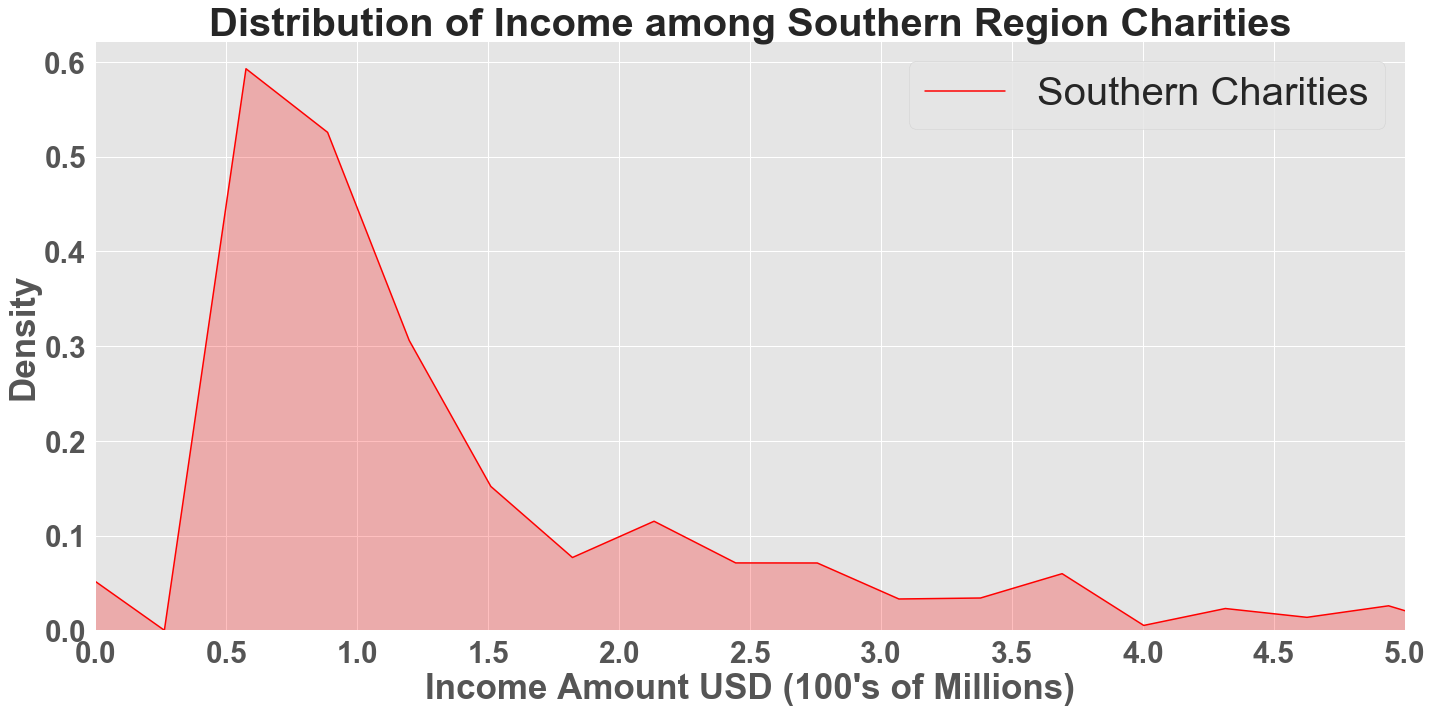

In [861]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(region3_charity_incomes, shade=True, color = "red",label="Southern Charities");

# ax.set_xticks(np.arange(0,np.max(region3_charity_incomes+1000000000), 1000000000))

ax.set_xlim(0,5 * 10**8)
ax.set_xticks(np.arange(0,5*10**8+1,5*10**7))
ax.set_xticklabels(np.arange(0,7,0.5), weight="bold",fontsize=30);
ax.set_xlabel("Income Amount USD (100's of Millions)", fontsize=35, weight = "bold")

ax.set_yticks(np.arange(0,0.65*10 ** -9,1*10**-10))
ax.set_yticklabels(["0.0","0.1","0.2","0.3","0.4","0.5","0.6",], weight="bold",fontsize=30);
ax.set_ylabel("Density", fontsize=35, weight = "bold")

ax.set_title("Distribution of Income among Southern Region Charities", fontsize=40, weight = "bold")
ax.legend(fontsize=40)

plt.tight_layout()
plt.savefig("South_Density")

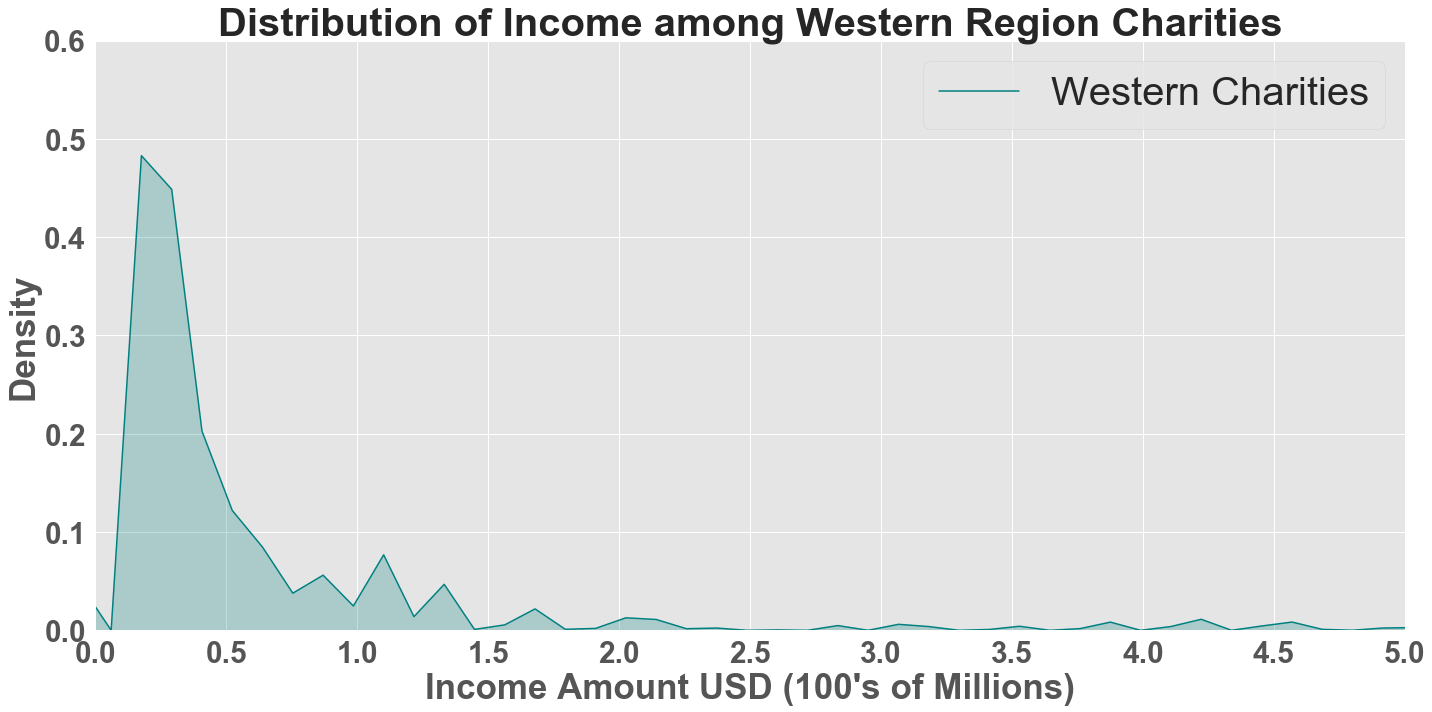

In [868]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(region4_charity_incomes, shade=True, color = "teal",label="Western Charities");

# ax.set_xticks(np.arange(0,np.max(region3_charity_incomes+1000000000), 1000000000))

ax.set_xlim(0,0.5 * 10**9)
ax.set_xticks(np.arange(0,0.5*10**9+1,5*10**7))
ax.set_xticklabels(np.arange(0,5+1,0.5), weight="bold",fontsize=30);
ax.set_xlabel("Income Amount USD (100's of Millions)", fontsize=35, weight = "bold")

ax.set_yticks(np.arange(0,0.65*10 ** -8,1*10**-9))
ax.set_yticklabels(["0.0","0.1","0.2","0.3","0.4","0.5","0.6",], weight="bold",fontsize=30);
ax.set_ylabel("Density", fontsize=35, weight = "bold")

ax.set_title("Distribution of Income among Western Region Charities", fontsize=40, weight = "bold")
ax.legend(fontsize=40)

plt.tight_layout()
plt.savefig("West_Density")

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(region1_charity_incomes, shade=True, color = "blue",label="Income Amount");

ax.set_xlim(0,1.6 * 10**9)
ax.set_xticks(np.arange(0,1.6*10**9+1,5*10**8))
ax.set_xticklabels(np.arange(0,4+1,0.5), weight="bold",fontsize=20);
ax.set_xlabel("Income Amount USD (Billions)", fontsize=25, weight = "bold")

ax.set_yticks(np.arange(0,0.65*10 ** -8,1*10**-9))
ax.set_yticklabels(["0.0","0.1","0.2","0.3","0.4","0.5","0.6",], weight="bold",fontsize=20);
ax.set_ylabel("Density", fontsize=25, weight = "bold")

ax.set_title("Distribution of Income among Northwestern Region Charities", fontsize=30, weight = "bold")
ax.legend(fontsize=30)

plt.savefig("Northwestern_Density")

In [428]:
region1_charity_incomes.max() / 10 **9

1.499102536

In [401]:
region2_charity_incomes.max() / 10 **9

3.362234653

In [402]:
region3_charity_incomes.max() / 10 **9

3.94838151

In [403]:
region4_charity_incomes.max() / 10 **9

1.457339895

In [305]:
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [234]:
np.max(region3_charity_incomes)

3948381510.0

In [243]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [604]:
# res = stats.mannwhitneyu(region1_charity_incomes, region2_charity_incomes, alternative="greater")
# print("p-value for NorthEast <= MidWest: {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region1_charity_incomes, region3_charity_incomes, alternative="greater")
# print("p-value for NorthEast <= South  : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region1_charity_incomes, region4_charity_incomes, alternative="greater")
# print("p-value for NorthEast <= West   : {:2.5f}".format(res.pvalue))

In [605]:
# res = stats.mannwhitneyu(region2_charity_incomes, region1_charity_incomes, alternative="greater")
# print("p-value for MidWest <= NorthEast: {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region2_charity_incomes, region3_charity_incomes, alternative="greater")
# print("p-value for MidWest <= South    : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region2_charity_incomes, region4_charity_incomes, alternative="greater")
# print("p-value for MidWest <= West     : {:2.5f}".format(res.pvalue))

In [606]:
# res = stats.mannwhitneyu(region3_charity_incomes, region1_charity_incomes, alternative="greater")
# print("p-value for South <= NorthEast  : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region3_charity_incomes, region2_charity_incomes, alternative="greater")
# print("p-value for South <= MidWest    : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region3_charity_incomes, region4_charity_incomes, alternative="greater")
# print("p-value for South <= West       : {:2.5f}".format(res.pvalue))

In [607]:
# res = stats.mannwhitneyu(region4_charity_incomes, region1_charity_incomes, alternative="greater")
# print("p-value for West <= NorthEast   : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region4_charity_incomes, region2_charity_incomes, alternative="greater")
# print("p-value for West <= MidWest     : {:2.5f}".format(res.pvalue))
# res = stats.mannwhitneyu(region4_charity_incomes, region3_charity_incomes, alternative="greater")
# print("p-value for West <= South       : {:2.5f}".format(res.pvalue))

In [624]:
x = API_df.groupby("classification").size().reset_index(name="Count")
x = x.sort_values(by="Count",ascending=False)
x

,classification,Count
0,Charitable Organization,6492
1,Educational Organization,1563
6,Religious Organization,305
4,Organization to Prevent Cruelty to Animals,171
2,Literary Organization,35
7,Scientific Organization,35
5,Organization to Prevent Cruelty to Children,17
3,Organization for Public Safety Testing,4


In [625]:
y = API_df.groupby("classification")["incomeAmount"].sum().reset_index(name="IncomeSum")
y = y.sort_values(by="IncomeSum",ascending=False)
y

,classification,IncomeSum
0,Charitable Organization,1.496211e+11
1,Educational Organization,3.904536e+10
6,Religious Organization,5.647871e+09
7,Scientific Organization,4.146908e+09
4,Organization to Prevent Cruelty to Animals,4.001963e+09
2,Literary Organization,1.163850e+09
5,Organization to Prevent Cruelty to Children,1.459111e+08
3,Organization for Public Safety Testing,3.279777e+07


In [627]:
z = pd.merge(x, y)
z["AVG_Income_Per_Charity"] = round((z['IncomeSum'] / z['Count']),2)

In [629]:
z.sort_values(by="AVG_Income_Per_Charity", ascending=False)

,classification,Count,IncomeSum,AVG_Income_Per_Charity
5,Scientific Organization,35,4.146908e+09,1.184831e+08
4,Literary Organization,35,1.163850e+09,3.325287e+07
1,Educational Organization,1563,3.904536e+10,2.498104e+07
3,Organization to Prevent Cruelty to Animals,171,4.001963e+09,2.340329e+07
0,Charitable Organization,6492,1.496211e+11,2.304700e+07
2,Religious Organization,305,5.647871e+09,1.851761e+07
6,Organization to Prevent Cruelty to Children,17,1.459111e+08,8.583004e+06
7,Organization for Public Safety Testing,4,3.279777e+07,8.199443e+06


In [631]:
xx = API_df.groupby("rating").size().reset_index(name="Count")
xx = xx.sort_values(by="Count",ascending=False)
xx

,rating,Count
3,3.0,3828
4,4.0,3440
2,2.0,1054
1,1.0,248
0,0.0,53


In [632]:
yy = API_df.groupby("rating")["incomeAmount"].sum().reset_index(name="IncomeSum")
yy = yy.sort_values(by="IncomeSum",ascending=False)
yy

,rating,IncomeSum
4,4.0,1.127729e+11
3,3.0,7.716194e+10
2,2.0,1.237758e+10
1,1.0,1.058008e+09
0,0.0,2.128504e+08


In [637]:
zz = pd.merge(xx, yy)
zz["AVG_Income_Per_Rating"] = round((zz['IncomeSum'] / zz['Count']),2)
zz.sort_values(by="AVG_Income_Per_Rating", ascending=False)

,rating,Count,IncomeSum,AVG_Income_Per_Rating
1,4.0,3440,1.127729e+11,32782829.09
0,3.0,3828,7.716194e+10,20157247.82
2,2.0,1054,1.237758e+10,11743436.05
3,1.0,248,1.058008e+09,4266162.59
4,0.0,53,2.128504e+08,4016046.09


In [638]:
four_star_df = API_df[API_df["rating"]==4]
three_star_df = API_df[API_df["rating"]==3]
two_star_df = API_df[API_df["rating"]==2]
one_star_df = API_df[API_df["rating"]==1]

In [639]:
four_star_df = API_df[API_df["rating"]==4]
three_star_df = API_df[API_df["rating"]==3]
two_star_df = API_df[API_df["rating"]==2]
one_star_df = API_df[API_df["rating"]==1]

four_star_df_incomes = four_star_df["incomeAmount"]
three_star_df_incomes = three_star_df["incomeAmount"]
two_star_df_incomes = two_star_df["incomeAmount"]
one_star_df_incomes = one_star_df["incomeAmount"]

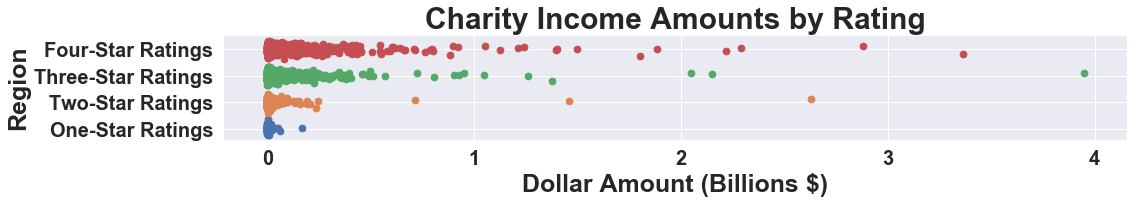

In [656]:

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(one_star_df_incomes, np.repeat(0, len(one_star_df_incomes)) + np.random.normal(0, 0.1, len(one_star_df_incomes)), s=45)
ax.scatter(two_star_df_incomes, np.repeat(1, len(two_star_df_incomes)) + np.random.normal(0, 0.1, len(two_star_df_incomes)), s=45)
ax.scatter(three_star_df_incomes, np.repeat(2, len(three_star_df_incomes)) + np.random.normal(0, 0.1, len(three_star_df_incomes)), s=45)
ax.scatter(four_star_df_incomes, np.repeat(3, len(four_star_df_incomes)) + np.random.normal(0, 0.1, len(four_star_df_incomes)), s=45)

ax.set_xticks(np.arange(0,np.max(region3_charity_incomes+1000000000), 1000000000))
ax.set_xticklabels((["0", "1", "2", "3", "4"]),fontsize = 20, weight = "bold")
ax.set_xlabel("Dollar Amount (Billions $)", fontsize = 25, weight = "bold")

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["One-Star Ratings", "Two-Star Ratings", "Three-Star Ratings", "Four-Star Ratings"], fontsize = 20, weight = "bold") ;
ax.set_ylabel("Region", fontsize = 25, weight = "bold")

ax.set_title("Charity Income Amounts by Rating", fontsize = 30, weight = "bold");

plt.tight_layout()
plt.savefig("Charity_Income_AMTs_Rating")

In [643]:
res = stats.mannwhitneyu(four_star_df_incomes, three_star_df_incomes, alternative="greater")
print("p-value for Four-Star <= Three-Star: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(four_star_df_incomes, two_star_df_incomes, alternative="greater")
print("p-value for Four-Star <= Two-Star  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(four_star_df_incomes, one_star_df_incomes, alternative="greater")
print("p-value for Four-Star <= One-Star  : {:2.5f}".format(res.pvalue))

p-value for Four-Star <= Three-Star: 0.00000
p-value for Four-Star <= Two-Star  : 0.00000
p-value for Four-Star <= One-Star  : 0.00000


In [653]:
res = stats.mannwhitneyu(three_star_df_incomes, four_star_df_incomes, alternative="greater")
print("p-value for Three-Star <= Four-Star: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(three_star_df_incomes, two_star_df_incomes, alternative="greater")
print("p-value for Three-Star <= Two-Star : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(three_star_df_incomes, one_star_df_incomes, alternative="greater")
print("p-value for Three-Star <= One-Star : {:2.5f}".format(res.pvalue))

p-value for Three-Star <= Four-Star: 1.00000
p-value for Three-Star <= Two-Star : 0.00000
p-value for Three-Star <= One-Star : 0.00000


In [654]:
res = stats.mannwhitneyu(two_star_df_incomes, four_star_df_incomes, alternative="greater")
print("p-value for Two-Star <= Four-Star : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(two_star_df_incomes, three_star_df_incomes, alternative="greater")
print("p-value for Two-Star <= Three-Star: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(two_star_df_incomes, one_star_df_incomes, alternative="greater")
print("p-value for Two-Star <= One-Star  : {:2.5f}".format(res.pvalue))

p-value for Two-Star <= Four-Star : 1.00000
p-value for Two-Star <= Three-Star: 1.00000
p-value for Two-Star <= One-Star  : 0.00000


In [655]:
res = stats.mannwhitneyu(one_star_df_incomes, four_star_df_incomes, alternative="greater")
print("p-value for One-Star <= Four-Star : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(one_star_df_incomes, three_star_df_incomes, alternative="greater")
print("p-value for One-Star <= Three-Star: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(one_star_df_incomes, two_star_df_incomes, alternative="greater")
print("p-value for One-Star <= Two-Star  : {:2.5f}".format(res.pvalue))

p-value for One-Star <= Four-Star : 1.00000
p-value for One-Star <= Three-Star: 1.00000
p-value for One-Star <= Two-Star  : 1.00000


rating
4.0    3440
3.0    3828
2.0    1054
1.0     248
dtype: int64
[4.0, 3.0, 2.0, 1.0]
[3440, 3828, 1054, 248]


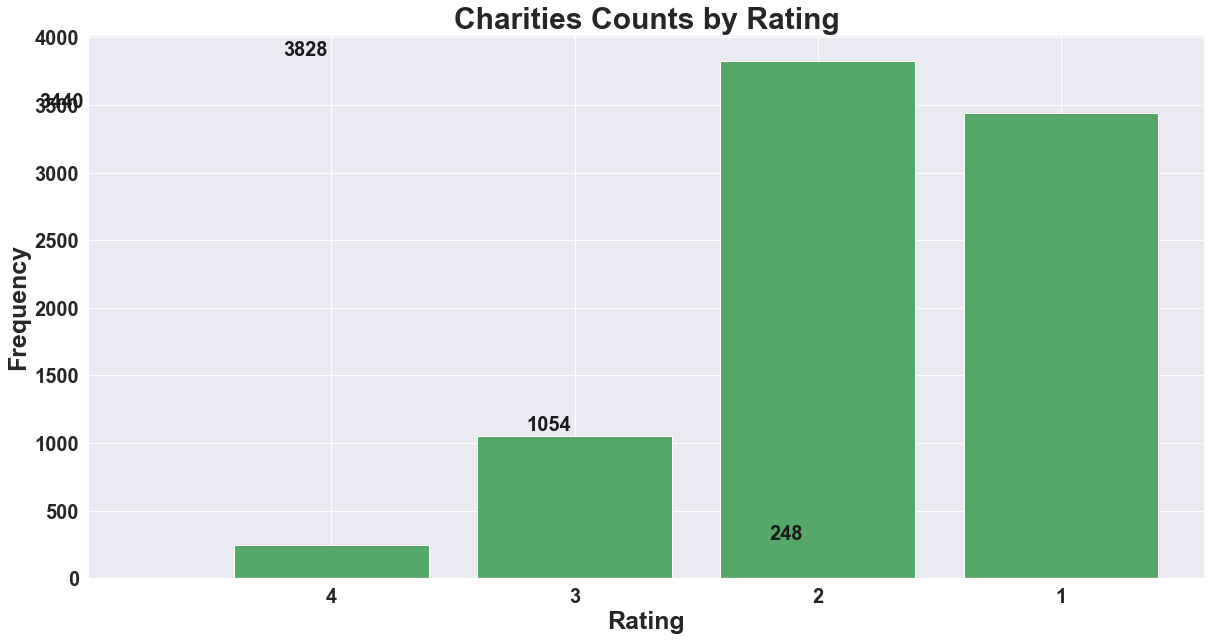

In [680]:
# Charity Count Bar Graph Total - By Rating
category_count = API_df.groupby('rating').size()
category_count = category_count.iloc[1:5]
category_count = category_count.sort_index(ascending=False)
print(category_count)
categories = list(category_count.index.values)
# categories = wrap_axis_labels(categories,13)
print(categories)
freq = freq_array(category_count)
print(freq)

fig,ax = plt.subplots(figsize = (20,10))
ax.bar(categories,freq, color = "g");

ax.set_xticks(np.arange(0,5,1))
ax.set_xticklabels([" ",4,3,2,1], rotation=0, weight = "bold",fontsize=20)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+200,500)) ;
ax.set_yticklabels(np.arange(0,np.max(freq)+200,500), weight="bold", fontsize =20) ;

ax.set_title("Charities Counts by Rating", weight = "bold",fontsize=30);
ax.set_xlabel("Rating", fontsize=25, weight = "bold");
ax.set_ylabel("Frequency", fontsize=25, weight = "bold");

set_labels(freq,ax,.20,(np.max(freq)/100),fsize=20,c="k")
# plt.savefig("Charities_by_state")